# (Exploration Ford GoBike System Data)
## by (Abdallah Kareem)

## Preliminary Wrangling

> This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area

In [52]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

## Exploring the data

In [53]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [55]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [56]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning the data

In [57]:
# droping the null values
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [59]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [60]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [61]:
# making new coulmn 'age' from the column 'member birth year'
df['age']  =2021-df.member_birth_year

In [62]:
# making new coulmn 'duration_min' from the column 'duration_sec' to make trip duration more understandable
df['duration_min']=df.duration_sec/60

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [64]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [65]:
df[df['duration_min']>60].age.count()

1386

In [66]:
# removing outliers from dyration
df = df[df['duration_min'] <=60]

In [67]:
df.duration_min.describe()

count    173566.000000
mean         10.308359
std           7.396235
min           1.016667
25%           5.350000
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_min, dtype: float64

In [68]:
df.age.describe()

count    173566.000000
mean         36.191610
std          10.116912
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

In [69]:
# removing outliers from age
df = df[df['age'] <=80]

In [70]:
# changing the type of start_time from object to datetime
df['start_time']=pd.to_datetime(df.start_time)

In [71]:
#creating new column start_day from the column start time to define the day of each trip 
df['start_day']= df['start_time'].dt.day_name()

In [72]:
df.member_gender.value_counts()

Male      129414
Female     40379
Other       3570
Name: member_gender, dtype: int64

In [73]:
#removing the other value from the data frame as it could be miss encoding in the data
df = df[df['member_gender']!='Other']

In [74]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min,start_day
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0,29.883333,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38.0,19.116667,Thursday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,32.0,26.916667,Thursday
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,29.0,17.483333,Thursday


In [75]:
#droping the columns that will not be used in the visualisation
df.drop(['duration_sec','start_station_id','start_station_latitude','start_station_longitude',
         'end_station_id','end_station_latitude','end_station_longitude',
         'bike_id','member_birth_year','bike_share_for_all_trip', 'start_time', 'end_time'],axis = 1 , inplace = True)

In [76]:
df.head()

,start_station_name,end_station_name,user_type,member_gender,age,duration_min,start_day
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,47.0,26.416667,Thursday
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,62.0,29.883333,Thursday
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,38.0,19.116667,Thursday
7,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Male,32.0,26.916667,Thursday
9,Post St at Kearny St,Mission Playground,Subscriber,Male,29.0,17.483333,Thursday


### What is the structure of your dataset?

> The dataset after cleaning and making new features contains 7 coulumn and 173363 row

### What is/are the main feature(s) of interest in your dataset?

> duration_min ,start_station_name , end_station_name,user_type , age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Text(0.5, 1.0, 'Age distribution')

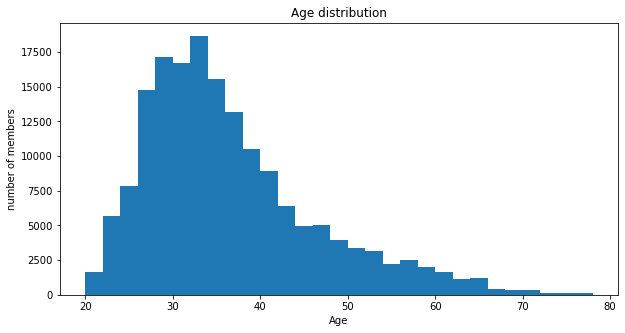

In [77]:
plt.figure(figsize=(10,5))
bins = np.arange(20 , df.age.max(),2)
plt.hist(data=df , x = 'age',bins = bins );
plt.xlabel('Age')
plt.ylabel('number of members');
plt.title('Age distribution')

> as the above plot indicates the majority of the users are in after their 25 to 35

Text(0.5, 1.0, 'duration distribution')

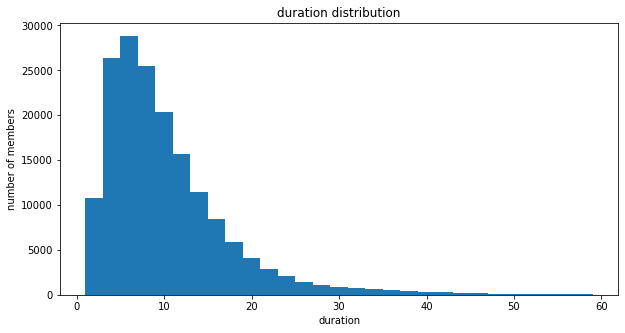

In [78]:
plt.figure(figsize=(10,5))
bins = np.arange(1, df.duration_min.max(),2)
plt.hist(data=df , x = 'duration_min',bins = bins );
plt.xlabel('duration')
plt.ylabel('number of members');
plt.title('duration distribution')

> as the above plot indicates the majority of the duration are around 3 to 15 minutes

In [79]:
df.duration_min.describe()

count    169793.000000
mean         10.288154
std           7.361607
min           1.016667
25%           5.350000
50%           8.450000
75%          12.966667
max          59.916667
Name: duration_min, dtype: float64

In [80]:
blue = sb.color_palette()[0]

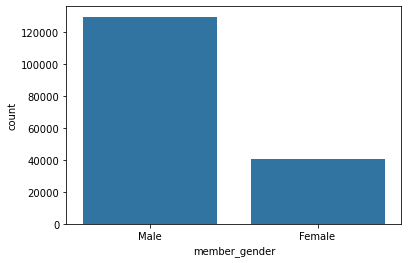

In [81]:
sb.countplot(data=df , x = 'member_gender' , color= blue);

> as plot shows the number of male users is greater than the female users

In [82]:
m = (df.user_type.value_counts())
p =pd.DataFrame(m)
order = p.index.tolist()

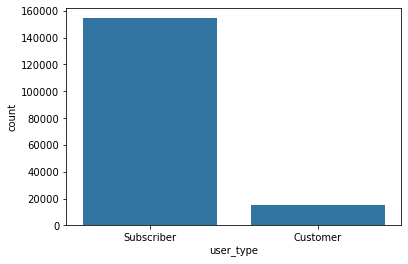

In [83]:
sb.countplot(data=df , x = 'user_type' , color= blue  , order=order);

>as plot shows the number of subscriber users is greater than the customer users

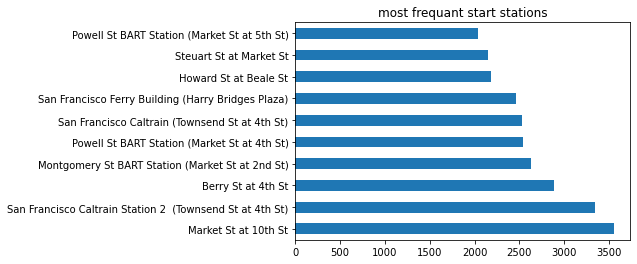

In [84]:
df['start_station_name'].value_counts().head(10).plot(kind='barh');
plt.title('most frequant start stations');

>  as plot indecates the most popluer start station is "Market St at 10th St"

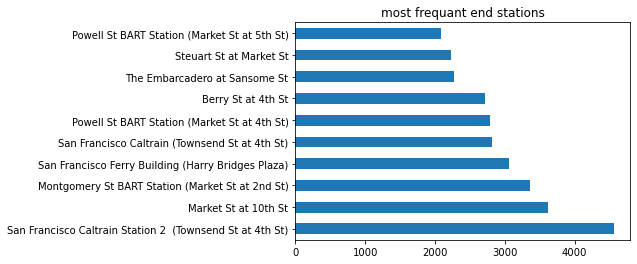

In [85]:
df['end_station_name'].value_counts().head(10).plot(kind='barh');
plt.title('most frequant end stations');

>as plot indecates the most popluer end station is "San Francisco Caltrain Station 2  (Townsend St at 4th St)"

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 > the distribution of  age show that the most number of user are between 25 to 35 years old , i had already removed the outliers from the age

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there was alot of outliers in age and duration_min

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

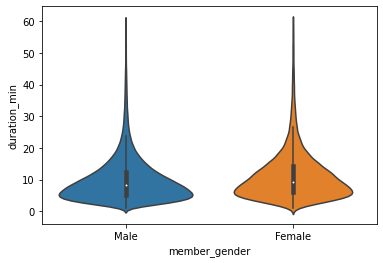

In [86]:
sb.violinplot(data=df , x = 'member_gender', y= 'duration_min');

Text(0.5, 0.98, 'Total duration per day')

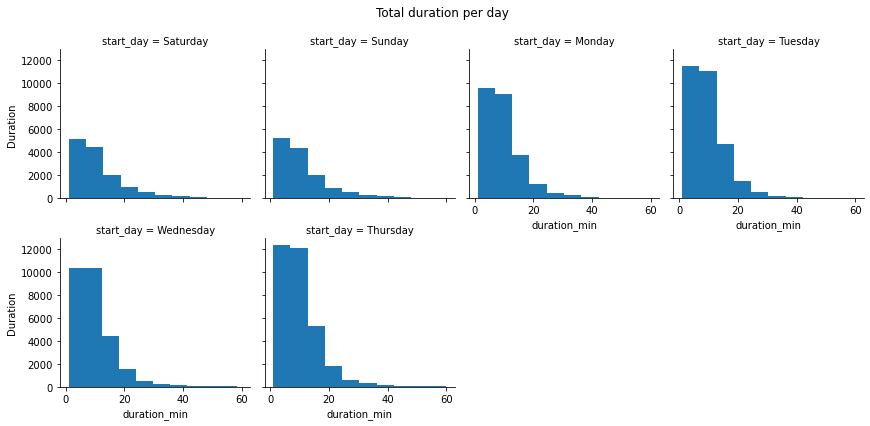

In [87]:
order = ['Saturday' , 'Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday']
g = sb.FacetGrid(data = df , col='start_day' , col_wrap=4 , col_order=order  )
g.map(plt.hist , 'duration_min' );
g.set_ylabels('Duration')
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle('Total duration per day')

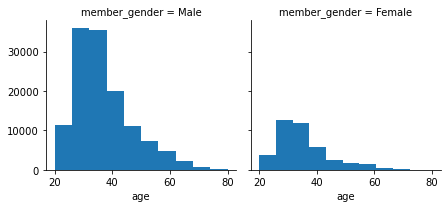

In [88]:
g = sb.FacetGrid(data = df , col='member_gender' , col_wrap=4)
g.map(plt.hist , 'age')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the duration in saterday and sunday is the lowest among the whole week

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> gender dosent affect the duration

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

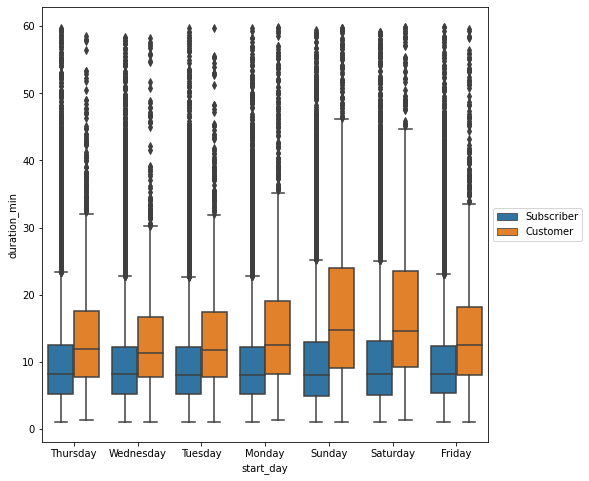

In [89]:
plt.figure(figsize=(8,8))
sb.boxplot(data = df , x = 'start_day', y = 'duration_min' , hue='user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

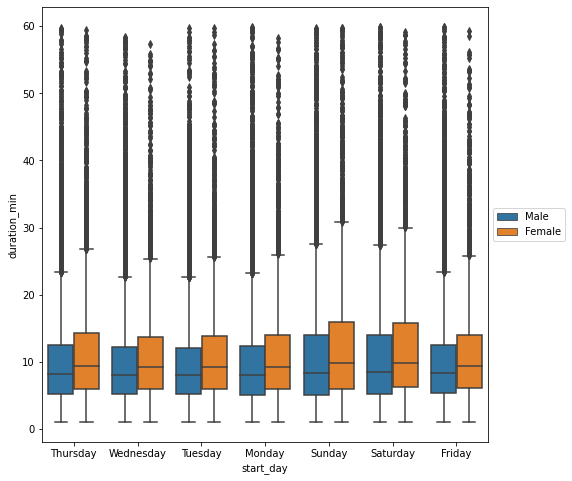

In [90]:
plt.figure(figsize=(8,8))
sb.boxplot(data = df , x = 'start_day', y = 'duration_min' , hue='member_gender')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> customers trip duration is higher than subscribers on average

### Were there any interesting or surprising interactions between features?

> from the bivariate we got that in saterday and sunday the total duration is lower then the other days  , but in multivariate we got that the avarege duration on saterday and mondy is higher than the other days

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [91]:
#df.to_csv('clean_data.csv' , index=None)